# EDA

### Import libs and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df_car = pd.read_csv('cleaned_car.csv')
df_car_original = pd.read_csv('car.csv')

### Q1: How does mileage relate to car price? Is there a clear negative correlation?

In [3]:
# Correlation Coefficient plot
correlation_coefficient = df_car['mileage_v2'].corr(df_car['price'])
print(f"\nCorrelation Coefficient between Mileage and Price: {correlation_coefficient:.2f}")



Correlation Coefficient between Mileage and Price: -0.15


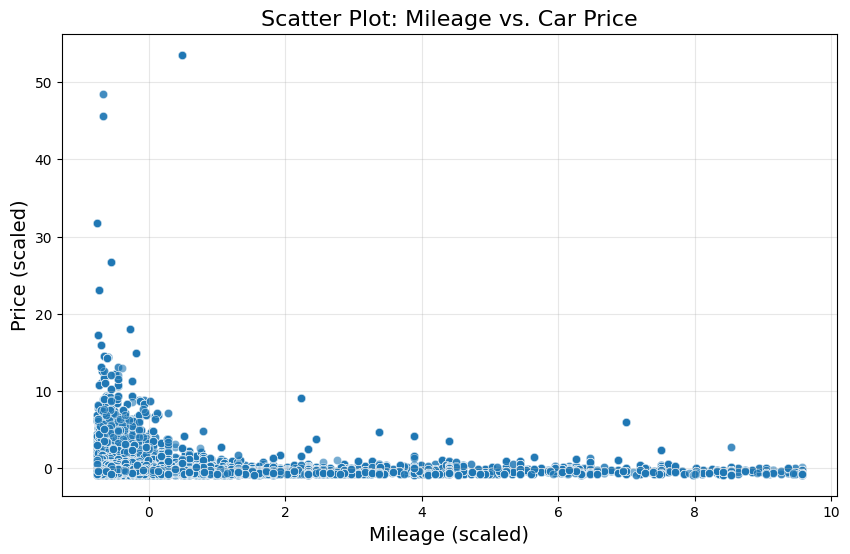

In [4]:
# Scatter Plot for Mileage vs. Price

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_car, x='mileage_v2', y='price', alpha=0.6)
plt.title('Scatter Plot: Mileage vs. Car Price', fontsize=16)
plt.xlabel('Mileage (scaled)', fontsize=14)
plt.ylabel('Price (scaled)', fontsize=14)
plt.grid(alpha=0.3)
plt.show()


### Observation
Có dấu hiệu negative nhẹ, khi mileage tăng thì giá xe có xu hướng giảm nhưng không đáng kể lắm, chủ yếu là ở tầm từ 0 - 0.2 của mileage, còn từ 0.2 up thì gần như không đổi.
Khi mileage cao thì giá chắc chắn thấp, khi mileage thấp thì giá diverse, phụ thuộc vào các biến khác.

### Q2: Does the fuel type (petrol, diesel, etc.) have a noticeable impact on price?

In [5]:
print("Unique fuel types in the dataset:")
print(df_car_original['fuel'].unique())

Unique fuel types in the dataset:
['petrol' 'oil' 'electric' 'hybrid' nan]


In [6]:
avg_price_by_fuel = df_car_original.groupby('fuel')['price'].mean().sort_values().apply(lambda x: int(x))
print("\nAverage price by fuel type (integer):")
print(avg_price_by_fuel)


Average price by fuel type (integer):
fuel
petrol      615330810
oil         665930209
electric    692474504
hybrid      983628587
Name: price, dtype: int64


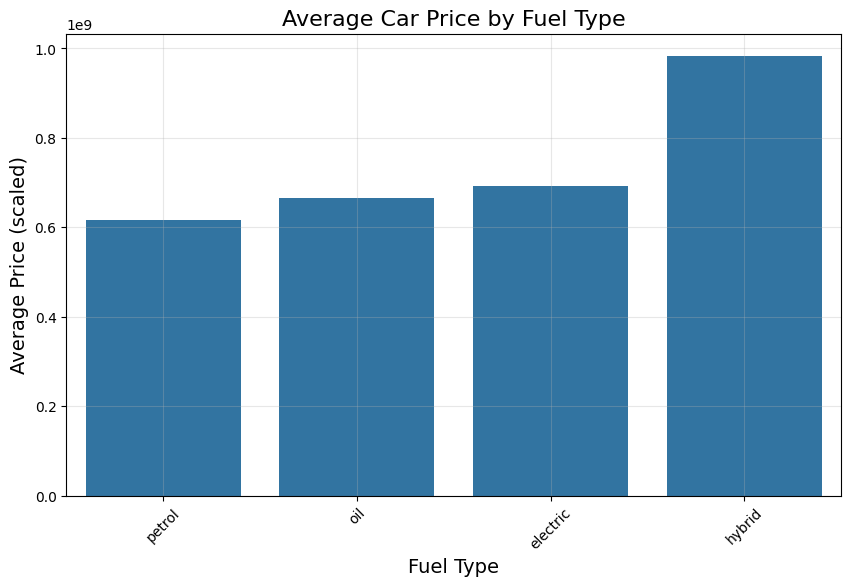

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_fuel.index, y=avg_price_by_fuel.values)
plt.title('Average Car Price by Fuel Type', fontsize=16)
plt.xlabel('Fuel Type', fontsize=14)
plt.ylabel('Average Price (scaled)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()


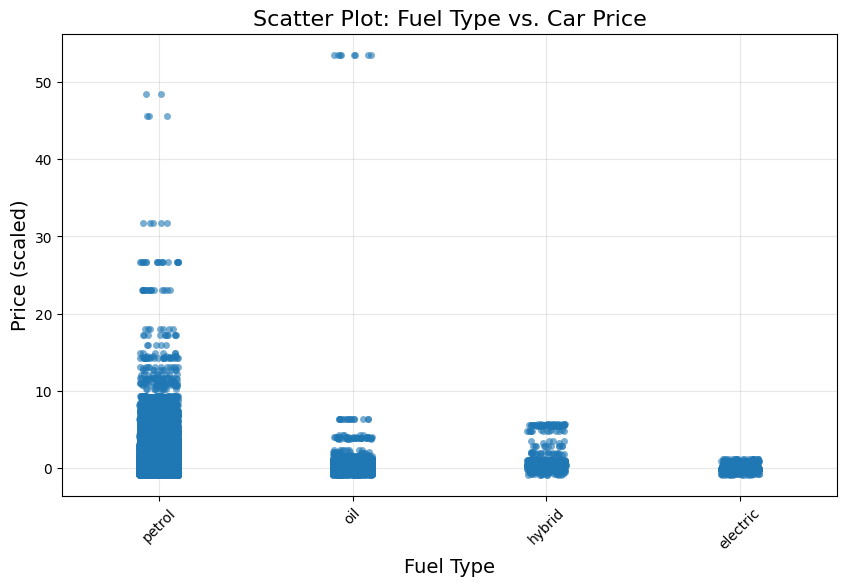

In [8]:
# Scatter plot for Fuel Type vs Price
plt.figure(figsize=(10, 6))
sns.stripplot(data=df_car, x='fuel', y='price', jitter=True, alpha=0.6)
plt.title('Scatter Plot: Fuel Type vs. Car Price', fontsize=16)
plt.xlabel('Fuel Type', fontsize=14)
plt.ylabel('Price (scaled)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()


### Observation:
- Có sự chênh lệch giá giữa các loại. Tuy nhiên, nếu xe là hybrid thì giá cao nhất, các loại kia giá gần ngang nhau (chênh lệch nhỏ, chưa tới 0.5).
- Các điểm giá của petrol trải rộng, có nhiều xe giá thấp, trong khi hybrid và electric tập trung ở mức giá cao hơn.
- Oil có giá tập trung trong khoảng trung bình, không quá cao cũng không quá thấp.


-> Fuel có ảnh hưởng tới giá xe một cách tương đối đáng kể

### Q3: How to compare two cars in the same segment?

First, two cars with the same segment mean that its the same type, brand, fuel, gearbox, origin, seats, condition.


Eliminate these features, we will have **mileage**, **manufacture_date** (or car age), and **color**.

Or I can say, it will depends on the car's condition and the customer's preferences on the look of the car. There might be more features refering this, and with pictures of the car.




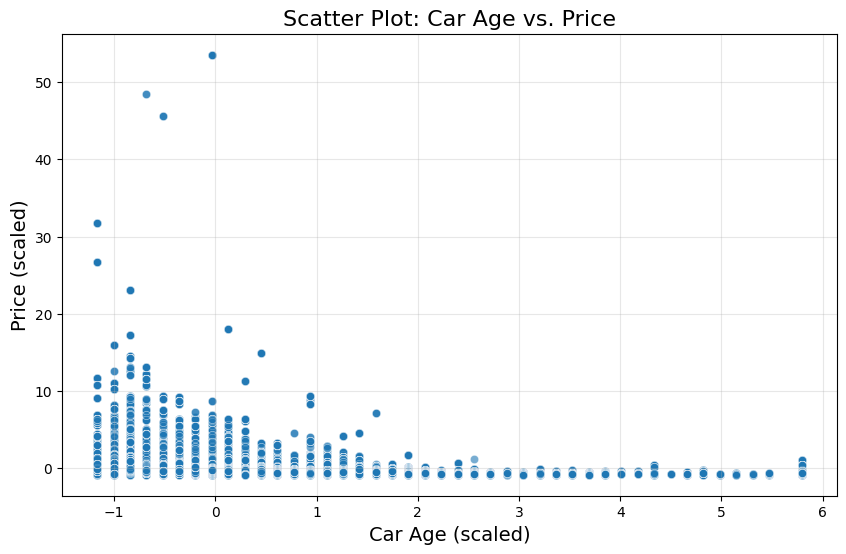

In [9]:
# Scatter plot for Car Age vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_car, x='car_age', y='price', alpha=0.6)
plt.title('Scatter Plot: Car Age vs. Price', fontsize=16)
plt.xlabel('Car Age (scaled)', fontsize=14)
plt.ylabel('Price (scaled)', fontsize=14)
plt.grid(alpha=0.3)
plt.show()

Giá xe có sự phụ thuộc vào car age khá nhiều.

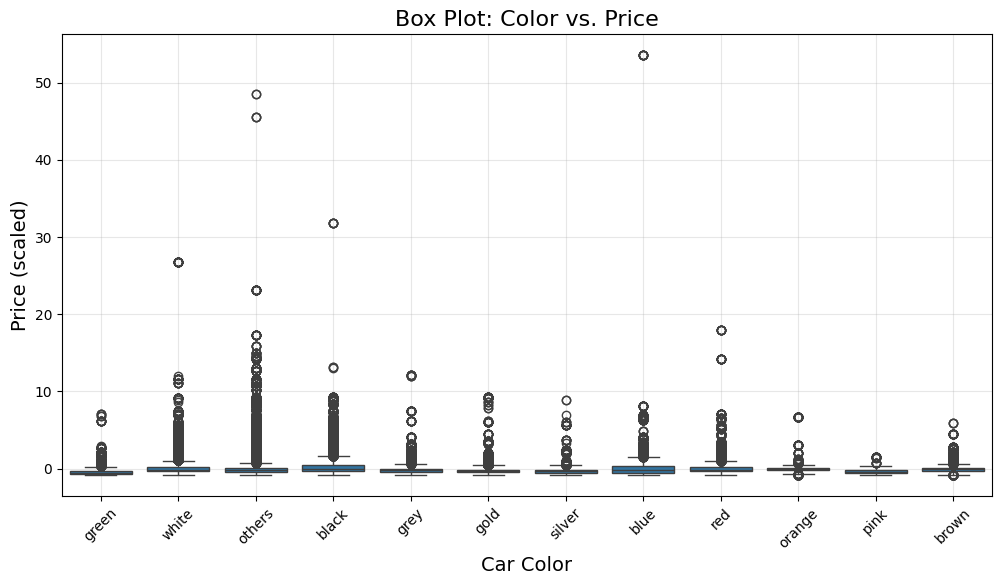

In [10]:
# Scatter plot for Color vs Price using Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_car, x='color', y='price', dodge=False)
plt.title('Box Plot: Color vs. Price', fontsize=16)
plt.xlabel('Car Color', fontsize=14)
plt.ylabel('Price (scaled)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()


Ở đây thì có thể thấy sự phân bổ giá khá đồng đều giữa các màu nên không có chênh lệch quá lớn, chỉ có xe màu cam và hồng khá ít so với phần còn lại.